<a href="https://colab.research.google.com/github/s-hashirahmed/cif10/blob/main/c10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, optimizers
from keras.layers.convolutional import Conv2D

In [3]:
from keras.utils import np_utils
import matplotlib.pyplot as plt

# 60k images with 32x32 dimensions each and 3 channels (r,g,b)

IMAGE_CHANNELS = 3
IMAGE_ROWS = 32
IMAGE_COLUMNS = 32

#CONSTANTS

BATCH_SIZE = 128
VALIDATION_SPLIT = .2
VERBOSE = 1
CLASSES = 2
EPOCHS = 100

OPTIM = optimizers.Adam(learning_rate=0.01) # learning rate to be defined

# Downloading the Data

In [4]:
(X_train, y_train),(X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


# Data Preprocessing

Normalizing

In [5]:

X_train = X_train/255 # normalize
X_test = X_test/255

Reshaping train and test sets

In [6]:
X_train.reshape((50000,32,32,3)).astype('float32')
X_test.reshape((10000, 32,32,3)).astype('float32')

samples , height, width, channel = X_train.shape


Binary Encoding

In [7]:
y_prac_train=np.where(np.isin(y_train, [[0],[1],[8],[9]]),0,1) # 0 where label is vehicle
print(np.unique(y_prac_train))

y_prac_test=np.where(np.isin(y_test, [[0],[1],[8],[9]]),0,1)
np.unique(y_prac_test)

[0 1]


array([0, 1])

In [8]:
X_train.shape
y_train.shape

(50000, 1)

In [9]:
y_train = np_utils.to_categorical(y_prac_train,2)
y_test = np_utils.to_categorical(y_prac_test,2)

y_test.shape

(10000, 2)

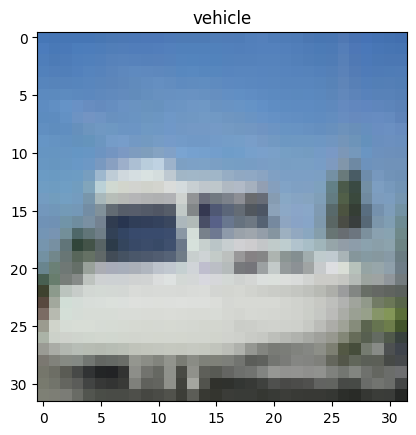

In [10]:
a = np.random.choice(range(len(X_train)))

classes = {0: 'animal', 1:'vehicle'} # dictionary mapping two classes..

plt.title(classes[y_train[a][0]])
plt.imshow(X_train[a], interpolation='none')

In [19]:
def build_m1(input_shape=(32,32,3), classes=2, learning_rate=.001):
  model = models.Sequential()
  model.add(layers.Conv2D(32, (4,4), activation='relu', input_shape=input_shape))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))

  model.add(layers.Dropout(.25))

  model.add(layers.Conv2D(32, (3,3), activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))

  model.add(layers.Flatten())
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(classes, activation='softmax'))

  model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])

  return model

def build_m2(input_shape=(32,32,3), classes=2, learning_rate=.001):
  model = models.Sequential()
  model.add(layers.Conv2D(128, (5,5), activation='relu', input_shape=(32,32,3)))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))

  model.add(layers.Conv2D(128, (3,3), activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))

  model.add(layers.Dropout(.25))

  model.add(layers.Conv2D(64, (2,2), activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(64, (2,2), activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(64, (2,2), activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))

  model.add(layers.Dropout(.25))

  model.add(layers.Flatten())
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(classes, activation='softmax'))

  return model


In [25]:
model_1 = build_m1()
model_2 = build_m1(learning_rate=.0001)
model_3 = build_m1(learning_rate=.00001)


In [ ]:
model_1.fit()

In [26]:
  # model_1 = models.Sequential()
  # model_1.add(layers.Conv2D(128, (5,5), activation='relu', input_shape=(32,32,3)))
  # model_1.add(layers.MaxPooling2D(pool_size=(2,2)))

  # model_1.add(layers.Conv2D(128, (3,3), activation='relu'))
  # model_1.add(layers.MaxPooling2D(pool_size=(2,2)))

  # model_1.add(layers.Dropout(.25))

  # model_1.add(layers.Conv2D(64, (2,2), activation='relu'))
  # model_1.add(layers.BatchNormalization())
  # model_1.add(layers.Conv2D(64, (2,2), activation='relu'))
  # model_1.add(layers.BatchNormalization())
  # model_1.add(layers.Conv2D(64, (2,2), activation='relu'))
  # model_1.add(layers.MaxPooling2D(pool_size=(2,2)))

  # model_1.add(layers.Dropout(.25))

  # model_1.add(layers.Flatten())
  # model_1.add(layers.Dense(512, activation='relu'))
  # model_1.add(layers.Dense(2, activation='softmax'))

In [27]:
input_shape = X_train.shape[1:]

In [28]:
# model = build((32,32,3),10)

In [ ]:
model_1.compile(loss='binary_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

In [29]:
hist_1 = model_1.fit(X_train,y_train, batch_size=BATCH_SIZE, verbose=VERBOSE, epochs=10, validation_split = .2)
hist_2 = model_2.fit(X_train,y_train, batch_size=BATCH_SIZE, verbose=VERBOSE, epochs=10, validation_split = .2) # to be replaces by constant set abve
hist_3 = model_3.fit(X_train,y_train, batch_size=BATCH_SIZE, verbose=VERBOSE, epochs=10, validation_split = .2)

Epoch 1/10
313/313 [==============================] - 5s 10ms/step - loss: 0.3412 - accuracy: 0.8528 - val_loss: 0.2741 - val_accuracy: 0.8959
Epoch 2/10
313/313 [==============================] - 2s 7ms/step - loss: 0.2568 - accuracy: 0.8961 - val_loss: 0.2410 - val_accuracy: 0.9050
Epoch 3/10
313/313 [==============================] - 2s 7ms/step - loss: 0.2353 - accuracy: 0.9047 - val_loss: 0.2211 - val_accuracy: 0.9144
Epoch 4/10
313/313 [==============================] - 2s 6ms/step - loss: 0.2254 - accuracy: 0.9106 - val_loss: 0.2125 - val_accuracy: 0.9178
Epoch 5/10
313/313 [==============================] - 2s 7ms/step - loss: 0.2134 - accuracy: 0.9147 - val_loss: 0.2060 - val_accuracy: 0.9204
Epoch 6/10
313/313 [==============================] - 2s 7ms/step - loss: 0.1975 - accuracy: 0.9215 - val_loss: 0.1923 - val_accuracy: 0.9271
Epoch 7/10
313/313 [==============================] - 3s 10ms/step - loss: 0.1876 - accuracy: 0.9255 - val_loss: 0.1905 - val_accuracy: 0.9276
Epoc

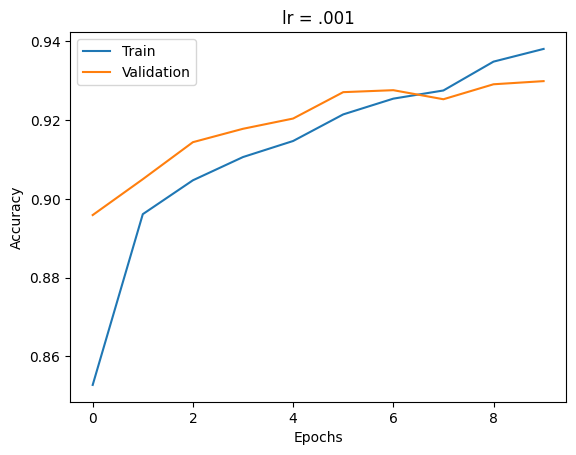

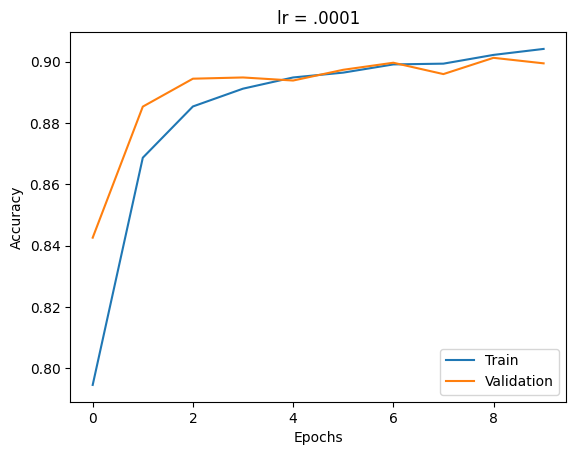

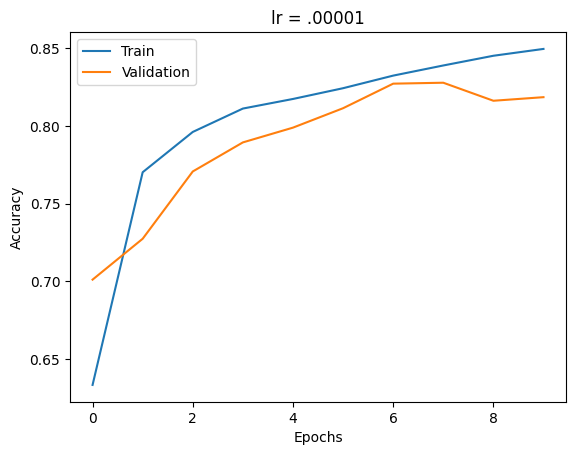

In [30]:
plt.plot(hist_1.history['accuracy'])
plt.plot(hist_1.history['val_accuracy'])
plt.title("lr = .001")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])

plt.show()

plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title("lr = .0001")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])

plt.show()

plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title("lr = .00001")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])

plt.show()


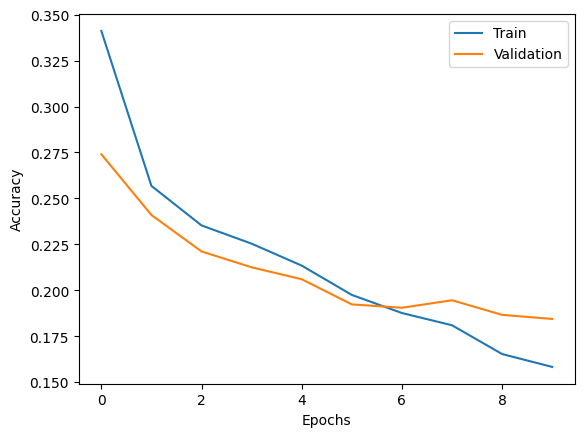

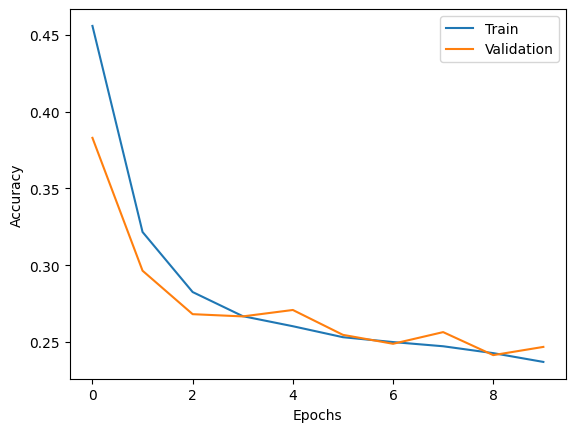

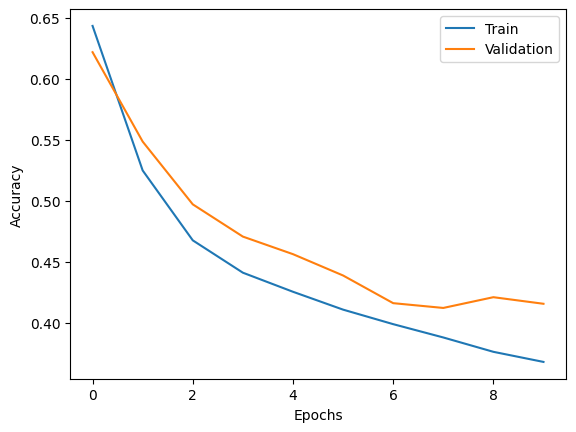

In [31]:
plt.plot(hist_1.history['loss'])
plt.plot(hist_1.history['val_loss'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])

plt.show()

plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])

plt.show()


plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])

In [32]:
metrics_1=model_1.evaluate(X_test,y_test)

print("Accuracy: ", metrics_1[1]*100)
print("Loss: ", metrics_1[0]*100)

y_hat_1=model_1.predict(X_test)



metrics_2=model_2.evaluate(X_test,y_test)

print("Accuracy: ", metrics_2[1]*100)
print("Loss: ", metrics_2[0]*100)

y_hat_2=model_2.predict(X_test)



metrics_3=model_3.evaluate(X_test,y_test)

print("Accuracy: ", metrics_3[1]*100)
print("Loss: ", metrics_3[0]*100)

y_hat_3=model_3.predict(X_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1798 - accuracy: 0.9297
Accuracy:  92.97000169754028
Loss:  17.975173890590668
313/313 [==============================] - 1s 3ms/step - loss: 0.2411 - accuracy: 0.9027
Accuracy:  90.27000069618225
Loss:  24.108125269412994
313/313 [==============================] - 1s 3ms/step - loss: 0.4129 - accuracy: 0.8185
Accuracy:  81.84999823570251
Loss:  41.28915071487427
313/313 [==============================] - 1s 2ms/step


In [35]:
from sklearn.metrics import confusion_matrix
y_test_temp_1 = np.argmax(y_test, axis=1)
y_hat_temp_1 = np.argmax(y_hat_1, axis=1)
cm_1 = confusion_matrix(y_test_temp_1,y_hat_temp_1)
print(cm_1)
print("---------------------------")

y_test_temp_2 = np.argmax(y_test, axis=1)
y_hat_temp_2 = np.argmax(y_hat_2, axis=1)
cm_2 = confusion_matrix(y_test_temp_2,y_hat_temp_2)
print(cm_2)

print("---------------------------")
y_test_temp_3 = np.argmax(y_test, axis=1)
y_hat_temp_3 = np.argmax(y_hat_3, axis=1)
cm_3 = confusion_matrix(y_test_temp_3,y_hat_temp_3)
print(cm_3)

[[3743  257]
 [ 446 5554]]
---------------------------
[[3645  355]
 [ 618 5382]]
---------------------------
[[3666  334]
 [1481 4519]]


<Axes: >

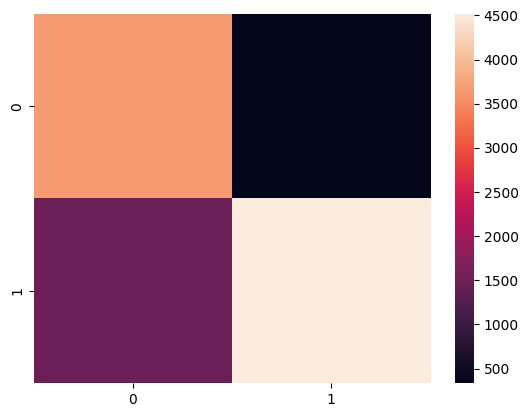

In [38]:
import seaborn as sns

# sns.heatmap(cm_1)


# sns.heatmap(cm_2)


sns.heatmap(cm_3)



In [ ]:
# np.argmax(model_1.predict(tf.constant([X_test[a]])))

In [ ]:
# np.argmax(y_test[a])

In [ ]:
# plt.imshow(X_test[a])

In [ ]:
# model.save('cifar10_cnn(78t, 74v).h5')


In [ ]:
# model.fit(X_train,y_train, batch_size=BATCH_SIZE, verbose=VERBOSE, epochs=50, validation_split = .2)

# Complex Neural Network Architecture

In [ ]:
# model.evaluate(X_test,y_test)

In [ ]:


modela = models.Sequential()
modela.add(layers.Conv2D(128, (6,6), input_shape=(32,32,3), activation='relu'))

modela.add(layers.BatchNormalization())

modela.add(layers.Conv2D(128, (5,5), activation='relu'))

modela.add(layers.MaxPooling2D(pool_size=(2,2)))
modela.add(layers.Dropout(0.2))

modela.add(layers.Conv2D(64, (4,4), activation='relu'))

modela.add(layers.BatchNormalization())

modela.add(layers.Conv2D(64, (3,3), activation='relu'))

modela.add(layers.MaxPooling2D(pool_size=(2,2)))
modela.add(layers.Dropout(0.3))

modela.add(layers.Conv2D(32, (2,2), activation='relu'))

modela.add(layers.BatchNormalization())

modela.add(layers.Conv2D(32, (1,1), activation='relu'))

modela.add(layers.MaxPooling2D(pool_size=(2,2)))
modela.add(layers.Dropout(0.4))


modela.add(layers.Flatten())
modela.add(layers.Dense(512,activation='relu'))
modela.add(layers.Dense(2,activation='softmax'))


In [ ]:
modela.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = modela.fit(X_train,y_train, batch_size=BATCH_SIZE, verbose=VERBOSE, epochs=10, validation_split = .2)

Epoch 1/10
313/313 [==============================] - 15s 36ms/step - loss: 0.3299 - accuracy: 0.8610 - val_loss: 0.6061 - val_accuracy: 0.6158
Epoch 2/10
313/313 [==============================] - 11s 34ms/step - loss: 0.2583 - accuracy: 0.8955 - val_loss: 0.3351 - val_accuracy: 0.8676
Epoch 3/10
313/313 [==============================] - 12s 39ms/step - loss: 0.2423 - accuracy: 0.9028 - val_loss: 0.3625 - val_accuracy: 0.8473
Epoch 4/10
313/313 [==============================] - 10s 33ms/step - loss: 0.2256 - accuracy: 0.9087 - val_loss: 0.2820 - val_accuracy: 0.8919
Epoch 5/10
313/313 [==============================] - 11s 35ms/step - loss: 0.2117 - accuracy: 0.9151 - val_loss: 0.2378 - val_accuracy: 0.9112
Epoch 6/10
313/313 [==============================] - 10s 33ms/step - loss: 0.2041 - accuracy: 0.9198 - val_loss: 0.3220 - val_accuracy: 0.8909
Epoch 7/10
313/313 [==============================] - 10s 33ms/step - loss: 0.1888 - accuracy: 0.9266 - val_loss: 0.2614 - val_accuracy:

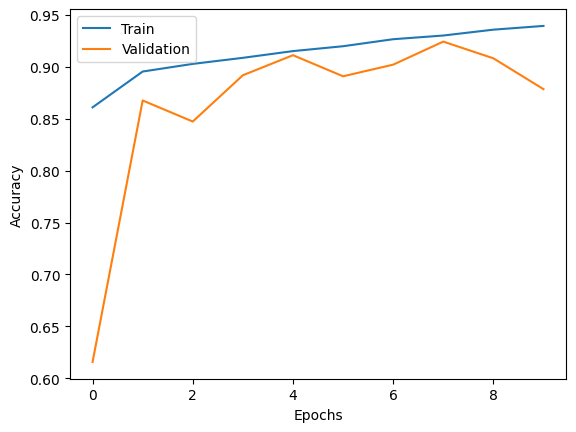

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])

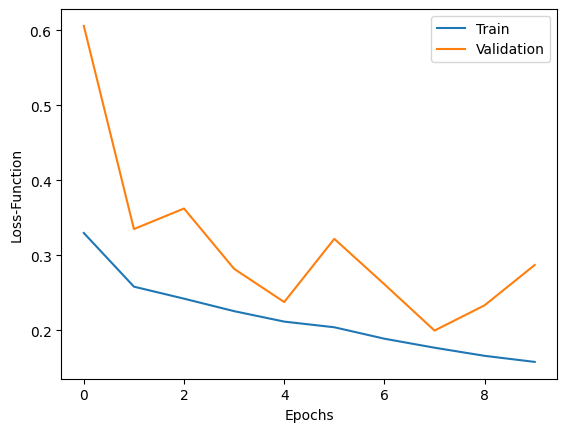

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss-Function')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])

In [ ]:
metrics=modela.evaluate(X_test,y_test)

print("Accuracy: ", metrics[1])
print("Loss: ", metrics[0])

y_hat=modela.predict(X_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.2863 - accuracy: 0.8815
Accuracy:  0.8815000057220459
Loss:  0.2862793505191803
313/313 [==============================] - 1s 3ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
y_test_temp = np.argmax(y_test, axis=1)
y_hat_temp = np.argmax(y_hat, axis=1)
cm = confusion_matrix(y_test_temp,y_hat_temp)

print("\tConfusion Matrix: \n")
print("\tTrue Positives:",cm[0,0])
print("\tTrue Negatives:",cm[0,1])
print("\tFalse Positives:",cm[1,1])
print("\tFalse Negatives:",cm[1,0])

# y_test_t

NameError: ignored

In [ ]:
modela.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 27, 27, 128)       13952     
                                                                 
 batch_normalization_7 (Batc  (None, 27, 27, 128)      512       
 hNormalization)                                                 
                                                                 
 conv2d_17 (Conv2D)          (None, 23, 23, 128)       409728    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 11, 11, 128)      0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 11, 11, 128)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 8, 8, 64)         

# Non Parametric -- KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5,algorithm='auto')

In [ ]:
32*32*3

3072

In [ ]:
X_train_reshaped_for_knn = X_train.reshape(X_train.shape[0],3072)
X_test_reshaped_for_knn = X_test.reshape(X_test.shape[0],3072) # since knn needs 2 dims.. we change the dimensions to (50000, 32x32x3=)

In [ ]:
y_train_reshaped_for_knn = np.argmax(y_train, axis=1)
y_test_reshaped_for_knn = np.argmax(y_test, axis=1)


In [ ]:
knn.fit(X_train_reshaped_for_knn, y_train_reshaped_for_knn)

KNeighborsClassifier()

In [ ]:
y_hat_knn=knn.predict(X_test_reshaped_for_knn)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test_reshaped_for_knn, y_hat_knn)

0.8079

In [ ]:
X_test[0].shape

(32, 32, 3)

In [ ]:
X_test_reshaped_for_knn[0]

array([0.61960784, 0.43921569, 0.19215686, ..., 0.08235294, 0.2627451 ,
       0.43137255])

In [ ]:
z = X_test[284].reshape(3072,)
z

array([1.        , 1.        , 1.        , ..., 0.44705882, 0.42745098,
       0.41960784])

In [ ]:
knn.predict([z])

array([0])

In [ ]:
y_test_reshaped_for_knn[284]

0

# Logistic Regression

In [ ]:
from sklearn.